In [2]:
import mysql.connector
import pandas as pd
import hashlib
from datetime import datetime

# Get current date and time
now = datetime.now()

# Separate them
today_date = now.date()   # Gives just the date (YYYY-MM-DD)
current_time = now.time() 
# Connect
conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="40418",
    database="aeras"
)
print("✅ Connected!")

# Buffered cursor avoids unread result issues
cursor = conn.cursor(buffered=True)

# Functions
def encoding(input_string):
    return hashlib.sha256(input_string.encode('utf-8')).hexdigest()

def genID(userid, pullerid, current_time, today_date):
    return encoding(pullerid + userid + current_time + today_date)


# Get next ID
cursor.execute("SELECT COUNT(*) FROM rides")
iD = cursor.fetchone()[0] + 1


✅ Connected!


In [3]:
df = pd.read_sql("SELECT * FROM rides", conn)
print(df)
#cursor.execute("ALTER TABLE pullers ADD ride_count int;")
conn.commit()

Empty DataFrame
Columns: [rideid, date, time, userid, pullerid, start, dest, status, abs_status, pickup_time]
Index: []


C:\Users\dibya\AppData\Local\Temp\ipykernel_17076\1194906449.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql("SELECT * FROM rides", conn)


Series([], Name: count, dtype: int64)


C:\Users\dibya\AppData\Local\Temp\ipykernel_17076\828375266.py:6: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql("SELECT dest FROM rides;", conn)


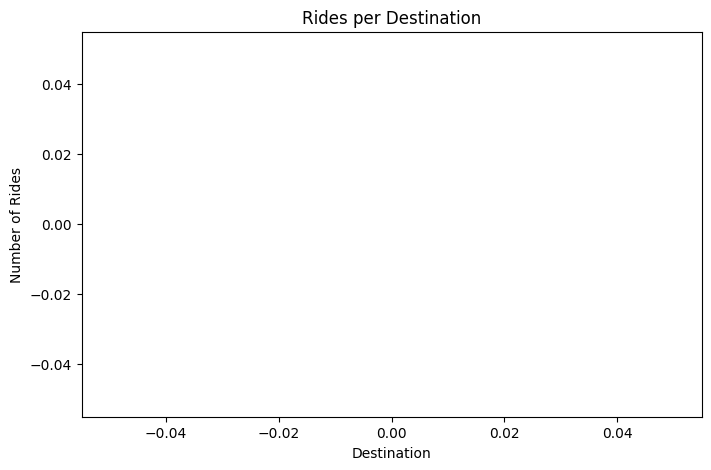

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Fetch destinations
df = pd.read_sql("SELECT dest FROM rides;", conn)

# Count occurrences of each location
counts = df['dest'].value_counts()  # Series: index = location, values = counts

print(counts)

# Plot
plt.figure(figsize=(8,5))
plt.bar(counts.index, counts.values, color='skyblue')
plt.xlabel("Destination")
plt.ylabel("Number of Rides")
plt.title("Rides per Destination")
plt.show()


In [6]:
cursor.execute("SHOW TABLES;")
tables = [table[0] for table in cursor.fetchall()]
print(tables)
cursor.execute("SHOW TABLES;")
tables = [table[0] for table in cursor.fetchall()]
print(tables)
for table in tables:
    df = pd.read_sql(f"SELECT * FROM {table};", conn)
    df.to_csv(f"{table}.csv", index=False)
    print(f"Exported {table} ({len(df)} rows)")


['location', 'points', 'pullers', 'rewards', 'rides', 'users']
['location', 'points', 'pullers', 'rewards', 'rides', 'users']
Exported location (0 rows)
Exported points (0 rows)
Exported pullers (0 rows)
Exported rewards (0 rows)
Exported rides (0 rows)
Exported users (0 rows)


C:\Users\dibya\AppData\Local\Temp\ipykernel_17076\3458296598.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(f"SELECT * FROM {table};", conn)
C:\Users\dibya\AppData\Local\Temp\ipykernel_17076\3458296598.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(f"SELECT * FROM {table};", conn)
C:\Users\dibya\AppData\Local\Temp\ipykernel_17076\3458296598.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(f"SELECT * FROM {table};", conn)
C:\Users\dibya\AppData\Local\Temp\ipyker

In [7]:
schema = {}

for table in tables:
    cursor.execute(f"DESCRIBE {table};")
    rows = cursor.fetchall()
    df = pd.DataFrame(rows, columns=["Field", "Type", "Null", "Key", "Default", "Extra"])
    schema[table] = df

schema



{'location':                  Field           Type Null  Key Default Extra
 0             pullerid   varchar(256)  YES  MUL    None      
 1             dest_lat   decimal(9,6)  YES         None      
 2            dest_long   decimal(9,6)  YES         None      
 3        dest_distance  decimal(10,2)  YES         None      
 4        cuet_distance  decimal(10,2)  YES         None      
 5   pahartoli_distance  decimal(10,2)  YES         None      
 6     naopara_distance  decimal(10,2)  YES         None      
 7      raojan_distance  decimal(10,2)  YES         None      
 8               status   varchar(256)  YES         None      
 9                  log       datetime  YES  MUL    None      
 10          currentlat   decimal(9,6)  YES         None      
 11         currentlong   decimal(9,6)  YES         None      ,
 'points':       Field          Type Null  Key Default           Extra
 0        id           int   NO  PRI    None  auto_increment
 1  pullerid  varchar(256)  YES     